In [1]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.cross_validation import train_test_split
import pylab as pl
from IPython import display
import pandas as pd
import sys
%matplotlib inline

/home/ankit/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def getFeatures(df):
    window_size = 1000
    total_batch = int(len(df)/window_size)
    trainX = pd.DataFrame()
    # Loop over all batches
    for i in range(total_batch):
        n = min(window_size, len(df)-i*window_size)
        df_win = df[i*window_size:i*window_size+n]
        group = df_win.groupby(['SrcAddr'])
        train_win = group.Sport.nunique()
        train_win = pd.DataFrame(train_win)
        train_win['udest_ip'] = group.DstAddr.nunique()
        train_win['udest_port'] = group.Dport.nunique()
        train_win['netflows'] = group.Dport.count()
        temp = pd.get_dummies(group.first()['Proto'])
        try:
            train_win['tcp'] = temp.tcp
        except:
            train_win['tcp'] = group.Dport.count()*0
        try:
            train_win['udp'] = temp.udp
        except:
             train_win['udp'] = group.Dport.count()*0
        train_win['bytes'] = group.TotBytes.sum()
        train_win['packets'] = group.TotPkts.sum()
        train_win['Label'] = (group.Label.sum()*1.0/group.Dport.count())> 0
        trainX = pd.concat([trainX,train_win],axis=0)    
    return trainX

In [25]:
import random
from sklearn.utils import shuffle

def somerows(x, n):
    return x.sample(n=n)

def selectFlows(filename):
    df = pd.read_csv(filename)
    df['Label'] = df.Label.str.contains("Botnet")
    dft = getFeatures(df)
    dfB = dft[dft['Label'] == True]
    dfN = dft[dft['Label'] == False]
    dfN = somerows(dfN,len(dfB))
#     print len(dfB)
#     print len(dfN)
    df = pd.concat([dfB,dfN],axis=0)   
    df = df.sample(frac=1).reset_index(drop=True)   
    df = shuffle(df)
    return df

In [26]:
dfTrain = pd.DataFrame()
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/3/capture20110812.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/4/capture20110815.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/5/capture20110815-2.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/7/capture20110816-2.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
print len(dfTrain)
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/10/capture20110818.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/11/capture20110818-2.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/12/capture20110819.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/13/capture20110815-3.binetflow")
dfTrain = pd.concat([dfTrain,df1],axis=0) 


# df1 = pd.read_csv("/home/ankit/Desktop/MTP/working_directory/Binenetflow/ISCX_Botnet-Training.biargus.binetflow")
# #Add Label to flows
# df1['Label'] = pd.Series(np.zeros(len(df1['Dur'])), index=df1.index)
# malicious_ips = "192.168.2.112 131.202.243.84 192.168.5.122 198.164.30.2 192.168.2.110 192.168.4.118 192.168.2.113 192.168.1.103 192.168.4.120 192.168.2.112 192.168.2.109 192.168.2.105 147.32.84.180 147.32.84.170 147.32.84.150 147.32.84.140 147.32.84.130 147.32.84.160 10.0.2.15 192.168.106.141 192.168.106.131 172.16.253.130 172.16.253.131 172.16.253.129 172.16.253.240 74.78.117.238 158.65.110.24 192.168.3.35 192.168.3.25 192.168.3.65 172.29.0.116 172.29.0.109 172.16.253.132 192.168.248.165 10.37.130.4"
# malicious_ips = malicious_ips.split()

# for i in malicious_ips:
#     df1.loc[df1["SrcAddr"] == i,"Label"] = 1

# df1 = getFeatures(df1)
# dfTrain = pd.concat([dfTrain,df1],axis=0) 
    
print len(dfTrain)

3456
10712


In [27]:
dfTest = pd.DataFrame()
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/1/capture20110810.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/2/capture20110811.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/6/capture20110816.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/8/capture20110816-3.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0) 
df1 = selectFlows("/home/ankit/Desktop/MTP/Database/CTU-13-Dataset/9/capture20110817.binetflow")
dfTest = pd.concat([dfTest,df1],axis=0)


# df1 = pd.read_csv("/home/ankit/Desktop/MTP/working_directory/Binenetflow/ISCX_Botnet-Testing.biargus.binenetflow")
# #Add Label to flows
# df1['Label'] = pd.Series(np.zeros(len(df1['Dur'])), index=df1.index)
# malicious_ips = "192.168.2.112 131.202.243.84 192.168.5.122 198.164.30.2 192.168.2.110 192.168.4.118 192.168.2.113 192.168.1.103 192.168.4.120 192.168.2.112 192.168.2.109 192.168.2.105 147.32.84.180 147.32.84.170 147.32.84.150 147.32.84.140 147.32.84.130 147.32.84.160 10.0.2.15 192.168.106.141 192.168.106.131 172.16.253.130 172.16.253.131 172.16.253.129 172.16.253.240 74.78.117.238 158.65.110.24 192.168.3.35 192.168.3.25 192.168.3.65 172.29.0.116 172.29.0.109 172.16.253.132 192.168.248.165 10.37.130.4"
# malicious_ips = malicious_ips.split()

# for i in malicious_ips:
#     df1.loc[df1["SrcAddr"] == i,"Label"] = 1

# df1 = getFeatures(df1)
# dfTest = pd.concat([dfTest,df1],axis=0) 

print len(dfTest)

32400


In [28]:
def getXY(df):
    temp = pd.get_dummies(df.Label)
    temp = pd.DataFrame(temp)
    Y = temp.as_matrix()
    X = df.copy()
    del X['Label']
    X = (X - X.mean()) / (X.max() - X.min())
    X = X.as_matrix()
    return X,Y

In [29]:
from sklearn.utils import shuffle
# dfTrain = shuffle(dfTrain)
# dfTest = shuffle(dfTest)
trainX, trainY = getXY(dfTest)
testX, testY = getXY(dfTrain)
seq_max_len = 1
n_input = 8
trainX = trainX.reshape(-1,seq_max_len,n_input)
testX = testX.reshape(-1,seq_max_len,n_input)

In [30]:
graph = tf.Graph()
with graph.as_default():
    # Parameters
    learning_rate = 0.0001
    training_iters = 50
    batch_size = 100
    display_step = 1

    # Network Parameters
    n_input = 8
    seq_max_len = 1 # Sequence max lengths
    n_hidden = 60 #hidden layer num of features
    n_classes = 2 # MNIST total classes (0-9 digits)
    n_layers = 2
    # tf Graph input
    x = tf.placeholder("float", [None, seq_max_len, n_input])
    y = tf.placeholder("float", [None, n_classes])
    
    # Define weights
    weights = {
        # Hidden layer weights => 2*n_hidden because of forward + backward cells
        'out': tf.Variable(tf.random_normal([n_hidden, n_classes]))
    }
    biases = {
        'out': tf.Variable(tf.random_normal([n_classes]))
    }

    def RNN(x, weights, biases):

        # Prepare data shape to match `bidirectional_rnn` function requirements
        # Current data input shape: (batch_size, n_steps, n_input)
        # Required shape: 'n_steps' tensors list of shape (batch_size, n_input)

        # Permuting batch_size and n_steps
        x = tf.transpose(x, [1, 0, 2])
        # Reshape to (n_steps*batch_size, n_input)
        x = tf.reshape(x, [-1, n_input])
        # Split to get a list of 'n_steps' tensors of shape (batch_size, n_input)
        x = tf.split(0, seq_max_len, x)

        # Define lstm cell with tensorflow
        lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(n_hidden, forget_bias=1.0)
        cell = tf.nn.rnn_cell.MultiRNNCell([lstm_cell] * n_layers)
        #initial_state = lstm_cell.zero_state(batch_size, tf.float32)
        # Get lstm cell output
        outputs, _ = tf.nn.rnn(cell, x, dtype=tf.float32)
        # Linear activation, using rnn inner loop last output
        return tf.matmul(outputs[-1], weights['out']) + biases['out']

    pred = RNN(x, weights, biases)

    # Define loss and optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    # Evaluate model
        correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

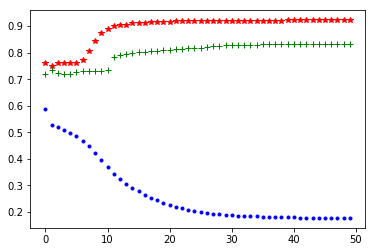

Iteration: 49 Loss: 0.176942 Train Accuracy: 0.922191 Test Accuracy: 0.830937 Optimization Finished!
('Training Accuracy:', 0.92219138)
('Testing Accuracy:', 0.83093727)


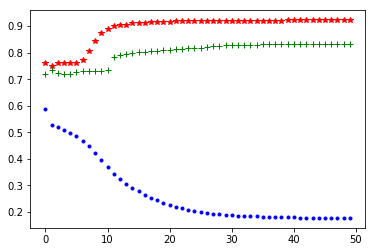

In [31]:
# Launch the graph
with tf.Session(graph=graph) as sess:
    # Initializing the variables
    init = tf.initialize_all_variables()
    sess.run(init)
    # Keep training until reach max iterations
    for iters in range(training_iters):
        total_batch = int(len(trainX)/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            n = min(batch_size, len(trainX)-i*batch_size)
            batch_x= trainX[i*batch_size:i*batch_size+n]
            batch_y =trainY[i*batch_size:i*batch_size+n]
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        if iters % display_step == 0:
            # Calculate batch accuracy
            Train_accuracy = sess.run(accuracy, feed_dict={x: trainX, y: trainY})
            # Calculate batch loss
            loss = sess.run(cost, feed_dict={x: trainX, y: trainY})
            #testX = testX.reshape(-1,seq_max_len,n_input)
            Test_accuracy=str(sess.run(accuracy,feed_dict={x:testX, y:testY}))    
            pl.plot([iters],loss,'b.',)
            pl.plot([iters],Train_accuracy,'r*',)
            pl.plot([iters],Test_accuracy,'g+')
            display.clear_output(wait=True)
            display.display(pl.gcf())   
            sys.stdout.flush()
            print("\rIteration: %s Loss: %s Train Accuracy: %s Test Accuracy: %s"%(iters,loss,Train_accuracy,Test_accuracy)),
            sys.stdout.flush()
    print("Optimization Finished!")
    
    print("Training Accuracy:", \
    sess.run(accuracy, feed_dict={x:trainX, y:trainY}))

    print("Testing Accuracy:", \
    sess.run(accuracy, feed_dict={x:testX, y:testY}))
    prediction=tf.argmax(pred,1)
    out =  prediction.eval(feed_dict={x: testX})

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(out, np.argmax(testY,1)) #0 = normal

array([[5177, 1632],
       [ 179, 3724]])

In [165]:
len(trainX)

32400